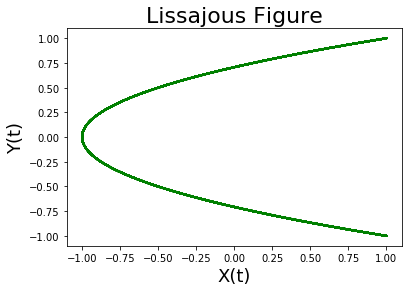

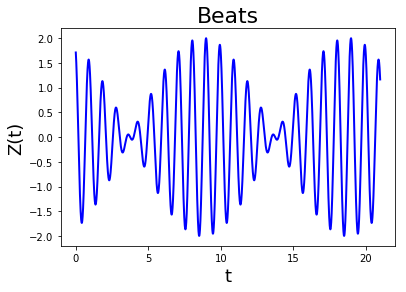

In [165]:
import math
import numpy as np
import matplotlib.pyplot as plt

#function that allows for non-integer timesteps
#I wrote this function because range does not allow non-integer steps
def frange(start, stop, step):
     i = start
     while i < stop:
         yield i
         i += step

#function creating X, Y, and Z using lists
def trigseqs(fx,fy,Ax,Ay,phi,dt,N):
    timesteps=list(frange(0,N+1,dt)) #defines timesteps
    #initializing X,Y,Z lists 
    X=[]
    Y=[]
    Z=[]
    #for each timestep, write value of X,Y,Z
    for i in range(len(timesteps)):
        X.append(Ax*np.cos(2*math.pi*fx*timesteps[i]))
        Y.append(Ay*np.cos(2*math.pi*fy*timesteps[i]+phi))
        Z.append(X[i]+Y[i])
    #writes data to .txt file in columns
    f = open('trigseqs.txt', 'w')
    for j in range(len(timesteps)):
        f.writelines([repr(X[j]),' ',repr(Y[j]),' ',repr(Z[j])])
        f.write("\n")
    f.close()
    return X,Y,Z,timesteps

#using numpy arrays
def trigarys(fx,fy,Ax,Ay,phi,dt,N):
    timesteps=np.arange(0,N+1,dt) #defines timesteps
    X=Ax*np.cos(2*math.pi*fx*timesteps)
    Y=Ay*np.cos(2*math.pi*fy*timesteps+phi)
    Z=X+Y
    table=np.c_[X,Y,Z] #appends X,Y,Z into table
    np.savetxt('trigarrays.txt',table) #writes to .txt file
    return X,Y,Z,timesteps

# initializes inputs
fx=2
fy=1
Ax=1
Ay=1
phi=0
dt=0.001
N=10
# runs functions and makes global variables
X,Y,Z,dt1=trigseqs(fx,fy,Ax,Ay,phi,dt,N)
Xa,Ya,Za,dta=trigarys(fx,fy,Ax,Ay,phi,dt,N)

#Lissajous Figures
plt.figure()
plt.plot(Xa, Ya, linewidth=2.0, color='green', label='listdata')
plt.xlabel('X(t)', fontsize=18)
plt.ylabel('Y(t)', fontsize=18)
plt.title('Lissajous Figure', fontsize=22)
# the next line saves the plot as a .png image with the parameter values in the file name
plt.savefig('Lissajous_'+'fx'+repr(round(fx,2))+'_fy'+repr(round(fy,2))+'_Ax'+repr(round(Ax,2))+'_Ay'+repr(round(Ay,2))+'_phi'+repr(round(phi,2))+'.png',bbox_inches='tight')
#for some reason, savefig is cutting off 
plt.show()

#Beats by Dre
#initializes different parameters, where fx and fy are separated by episilon
fbx=1
episilon=0.1
fby=fbx+episilon
Nb=20
phib=math.pi/4

Xb,Yb,Zb,dtb=trigarys(fbx,fby,Ax,Ay,phib,dt,Nb)

plt.figure()
plt.plot(dtb, Zb, linewidth=2.0, color='blue', label='listdata')
plt.xlabel('t', fontsize=18)
plt.ylabel('Z(t)', fontsize=18)
plt.title('Beats', fontsize=22)
plt.savefig('Beats_'+'fx'+repr(round(fbx,2))+'_fy'+repr(round(fby,2))+'_Ax'+repr(round(Ax,2))+'_Ay'+repr(round(Ay,2))+'_phi'+repr(round(phib,2))+'.png',bbox_inches='tight')
plt.show()

#print(X)
#print(Y)
#print(Z)